<a href="https://colab.research.google.com/github/mkleshchenok/mlbookcamp-code/blob/master/course-zoomcamp/02-regression/hw-week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%autosave 0

Autosave disabled


## 2. Machine Learning for Regression


In [2]:
import pandas as pd
import numpy as np

## 2.2 Data preparation

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [4]:
!wget $data 

--2021-09-19 12:19:11--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv’

AB_NYC_2019.csv     100%[===================>]   6.75M  --.-KB/s    in 0.07s   

2021-09-19 12:19:12 (102 MB/s) - ‘AB_NYC_2019.csv’ saved [7077973/7077973]



In [29]:
df = pd.read_csv('AB_NYC_2019.csv')

In [40]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [41]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [42]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [43]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## 2.3 Exploratory data analysis

In [44]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

id
[2539 2595 3647 3831 5022]
48895

name
['clean_&_quiet_apt_home_by_the_park' 'skylit_midtown_castle'
 'the_village_of_harlem....new_york_!' 'cozy_entire_floor_of_brownstone'
 'entire_apt:_spacious_studio/loft_by_central_park']
47486

host_id
[2787 2845 4632 4869 7192]
37457

host_name
['john' 'jennifer' 'elisabeth' 'lisaroxanne' 'laura']
11428

neighbourhood_group
['brooklyn' 'manhattan' 'queens' 'staten_island' 'bronx']
5

neighbourhood
['kensington' 'midtown' 'harlem' 'clinton_hill' 'east_harlem']
221

latitude
[40.64749 40.75362 40.80902 40.68514 40.79851]
19048

longitude
[-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
14718

room_type
['private_room' 'entire_home/apt' 'shared_room']
3

price
[149 225 150  89  80]
674

minimum_nights
[ 1  3 10 45  2]
109

number_of_reviews
[  9  45   0 270  74]
394

last_review
['2018-10-19' '2019-05-21' nan '2019-07-05' '2018-11-19']
1764

reviews_per_month
[0.21 0.38  nan 4.64 0.1 ]
937

calculated_host_listings_count
[6 2 1 4 3]
47

avail

In [45]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean_&_quiet_apt_home_by_the_park,2787,john,brooklyn,kensington,40.64749,-73.97237,private_room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit_midtown_castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the_village_of_harlem....new_york_!,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private_room,150,3,0,NaN,NaN,1,365
3,3831,cozy_entire_floor_of_brownstone,4869,lisaroxanne,brooklyn,clinton_hill,40.68514,-73.95976,entire_home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire_apt:_spacious_studio/loft_by_central_park,7192,laura,manhattan,east_harlem,40.79851,-73.94399,entire_home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,charming_one_bedroom_-_newly_renovated_rowhouse,8232441,sabrina,brooklyn,bedford-stuyvesant,40.67853,-73.94995,private_room,70,2,0,NaN,NaN,2,9
48891,36485057,affordable_room_in_bushwick/east_williamsburg,6570630,marisol,brooklyn,bushwick,40.70184,-73.93317,private_room,40,4,0,NaN,NaN,2,36
48892,36485431,sunny_studio_at_historical_neighborhood,23492952,ilgar_&_aysel,manhattan,harlem,40.81475,-73.94867,entire_home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd_st._time_square-cozy_single_bed,30985759,taz,manhattan,hell's_kitchen,40.75751,-73.99112,shared_room,55,1,0,NaN,NaN,6,2


Distribution of price

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Look at the price variable. Does it have a long tail?

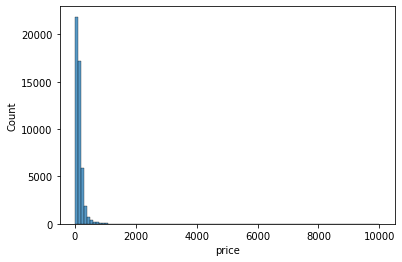

In [47]:
sns.histplot(df.price, bins=100)

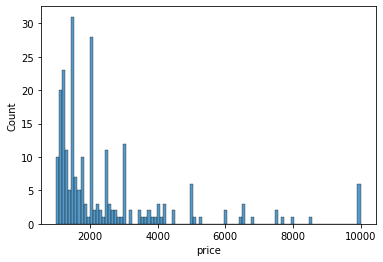

In [48]:
sns.histplot(df.price[df.price > 1000], bins=100)

Yes it has long tail.

In [49]:
price_logs = np.log1p(df.price)

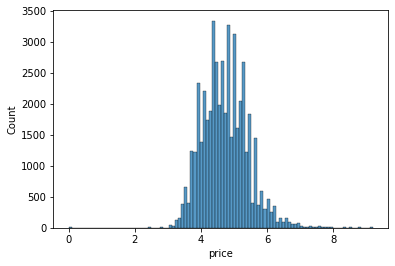

In [50]:
sns.histplot(price_logs, bins=100)

Missing values

In [39]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Question 1**: Number of missing values \
Find a feature with missing values. How many missing values does it have?

In [52]:
df_hw=df[['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']]

In [53]:
df_hw.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

reviews_per_month - 10052

**Question 2** \
What's the median (50% percentile) for variable 'minimum_nights'?

In [55]:
df_hw.minimum_nights.mean()

7.029962163820431

**Split the data** \
*   Shuffle the initial dataset, use seed 42.
*   Split your data in train/val/test sets, with 60%/20%/20% distribution.
*   Make sure that the target value ('price') is not in your dataframe.
*   Apply the log transformation to the price variable using the np.log1p() function.



In [56]:
n = len(df_hw)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [57]:
n_val, n_test, n_train

(9779, 9779, 29337)

## 2.4 Setting up the validation framework

Let's draw it

In [ ]:
df_hw.drop('')

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [58]:
idx = np.arange(n)

In [59]:
np.random.seed(42)
np.random.shuffle(idx)

In [61]:
df_train = df_hw.iloc[idx[:n_train]]
df_val = df_hw.iloc[idx[n_train:n_train+n_val]]
df_test = df_hw.iloc[idx[n_train+n_val:]]

In [62]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


In [63]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [64]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [65]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [66]:
del df_train['price']
del df_val['price']
del df_test['price']

In [67]:
len(y_train)

29337

## 2.5 Linear regression

draw

In [68]:
df_train.iloc[10]

latitude                           40.75078
longitude                         -73.87949
minimum_nights                      1.00000
number_of_reviews                   4.00000
reviews_per_month                   2.11000
calculated_host_listings_count      4.00000
availability_365                  354.00000
Name: 10, dtype: float64

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [ ]:
train_linear_regression(X, y)

(2.0460143454602068e+20,
 array([1.26525728e+20, 8.71025484e+01, 2.59709297e+02, 0.00000000e+00]))

## 2.8 Car price baseline model

In [ ]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [ ]:
w0

7.9272573880700605

In [ ]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

<AxesSubplot:ylabel='Count'>

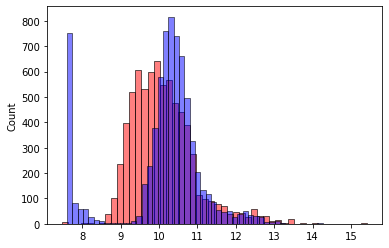

In [ ]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)


## 2.9 RMSE

In [ ]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [ ]:
rmse(y_train, y_pred)

0.7554192603920132

## 2.10 Validating the model

In [ ]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.7616530991301577

## 2.11 Simple feature engineering

In [ ]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5172055461058291

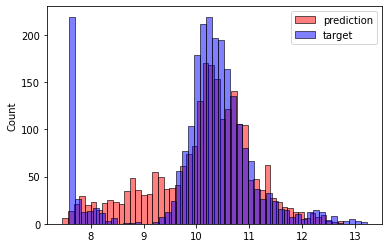

In [ ]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

## 2.12 Categorical variables

In [ ]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [ ]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

266.5994263627081

In [ ]:
w0, w

(3066759258862621.0,
 array([-7.90863204e-01,  1.80621909e+02,  1.97903973e+01,  1.46968041e+01,
        -3.39713455e-04,  7.74924546e+00,  9.76297867e+03,  9.83480038e+03,
         9.77003629e+03, -2.36936868e+01, -6.98582110e+00,  7.93435108e+01,
        -7.33167695e+01, -6.60897799e+00, -1.00310530e+01,  7.79383982e+01,
        -4.19367134e+01, -6.14213575e+01,  2.12412304e+02,  1.02166851e+03,
         9.08719092e+02,  9.84633740e+02,  1.06771237e+03,  7.00547494e+02,
        -3.06675926e+15, -3.06675926e+15, -3.06675926e+15, -3.06675926e+15,
         2.52356626e+00,  3.40712703e+00, -1.27416249e+01,  1.22844560e+01,
        -1.51620939e+01,  3.09315910e+02,  2.88692636e+02,  2.78158171e+02,
        -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
        -2.90235596e-01]))

## 2.13 Regilarization

In [ ]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [ ]:
y= [1, 2, 3, 1, 2, 3]

In [ ]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [ ]:
XTX_inv = np.linalg.inv(XTX)

In [ ]:
XTX_inv

array([[ 3.85321698e-02,  1.20696663e+05, -1.20696696e+05],
       [ 1.20696640e+05, -2.74658839e+14,  2.74658839e+14],
       [-1.20696680e+05,  2.74658839e+14, -2.74658839e+14]])

In [ ]:
XTX_inv.dot(X.T).dot(y)

array([ 6.24269892e-01,  3.44329390e+06, -3.44329299e+06])

In [ ]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [ ]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [ ]:
XTX = XTX + 0.01 * np.eye(3)

In [ ]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [ ]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4608208286209523

## 2.14 Tuning the model

In [ ]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 3066759258862621.0 266.5994263627081
1e-05 6.6398149018651305 0.46081532123609276
0.0001 7.12965014007955 0.4608153659783837
0.001 7.13085491393288 0.46081585838957173
0.1 7.0002324128629025 0.4608736549134577
1 6.250747846974607 0.46158128382779856
10 4.7295125856710305 0.472609877266903


In [ ]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.46081585838957173

## 2.15 Using the model

In [ ]:
df_full_train = pd.concat([df_train, df_val])

In [ ]:
df_full_train = df_full_train.reset_index(drop=True)

In [ ]:
X_full_train = prepare_X(df_full_train)

In [ ]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [ ]:
y_full_train = np.concatenate([y_train, y_val])

In [ ]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [ ]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.4600753970266562

In [ ]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [ ]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [ ]:
X_small = prepare_X(df_small)

In [ ]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.63249250912739

In [ ]:
np.expm1(y_pred)

41459.336786653585

In [ ]:
np.expm1(y_test[20])

35000.00000000001

## 2.16 Next steps

* We included only 5 top features. What happens if we include 10?

Other projects

* Predict the price of a house - e.g. boston dataset
* https://archive.ics.uci.edu/ml/datasets.php?task=reg
* https://archive.ics.uci.edu/ml/datasets/Student+Performance

## 2.17 Summary

* EDA - looking at data, finding missing values
* Target variable distribution - long tail => bell shaped curve
* Validation framework: train/val/test split (helped us detect problems)
* Normal equation - not magic, but math
* Implemented it with numpy
* RMSE to validate our model
* Feature engineering: age, categorical features
* Regularization to fight numerical instability